In [ ]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
class GradientBoostingCustom(BaseEstimator):
    
    @staticmethod
    def mse_grad(y_true, y_pred):
        return y_true - y_pred
    
    def __init__(self, n_estimators=10, learning_rate=0.01, max_depth=3, random_state=17):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        
        self.y = 0
        self.pred_fit = []
        self.pred = []

        self.trees_ = []
        self.residuals_ = []
            
    def fit(self, X, y):
        self.y = y.mean()
        self.residuals_.append(self.mse_grad(y, self.y))
        tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
        tree.fit(X, self.residuals_[-1])
        self.trees_.append(tree)
        self.pred_fit = self.learning_rate * self.trees_[-1].predict(X) + self.y
        
        for i in range(self.n_estimators - 1):
            # self.residuals_.append(self.mse_grad(y, self.trees_[-1].predict(X)))
            self.residuals_.append(self.mse_grad(y, self.pred_fit))
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, self.residuals_[-1])
            self.trees_.append(tree)
            self.pred_fit += self.learning_rate * self.trees_[-1].predict(X)
        return self
          
    def predict(self, X):
        self.pred = self.y
        for i in self.trees_:
            self.pred += self.learning_rate * i.predict(X)
        return self.pred

In [ ]:
X_train = np.arange(7).reshape(-1, 1)
y_train = (np.arange(7) - 3) ** 2

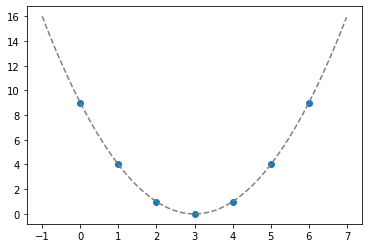

In [ ]:
X_test = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01)

plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
gbm = GradientBoostingCustom(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=17)
gbm.fit(X_train, y_train)

GradientBoostingCustom(learning_rate=0.1, n_estimators=200)

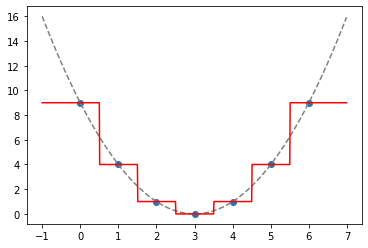

In [ ]:
plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
plt.scatter(X_train, y_train)
plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), color='red')
plt.show()

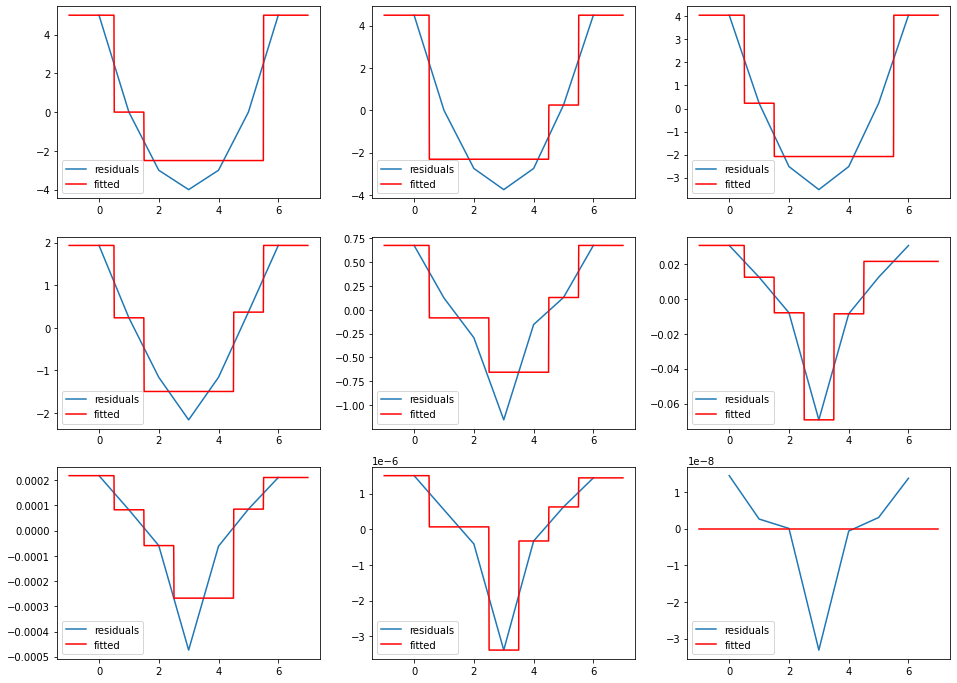

In [ ]:
plt.subplots(3, 3, figsize=(16, 12))

for ax, tree_idx in enumerate([1, 2, 3, 10, 20, 50, 100, 150, 200], 1):
    plt.subplot(3, 3, ax)
    plt.plot(X_train, gbm.residuals_[tree_idx - 1], label='residuals')
    plt.plot(X_test, gbm.trees_[tree_idx - 1].predict(X_test.reshape(-1, 1)), 
             color='red', label='fitted');
    plt.legend();

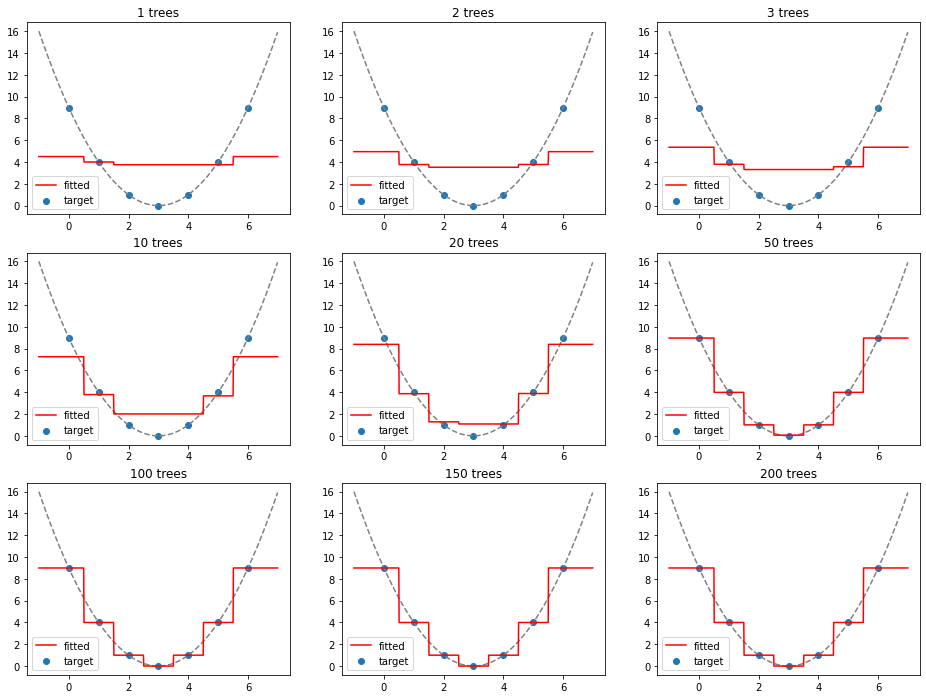

In [ ]:
plt.subplots(3, 3, figsize=(16, 12))

for ax, num_trees in enumerate([1, 2, 3, 10, 20, 50, 100, 150, 200], 1):
    plt.subplot(3, 3, ax)
    gbm = GradientBoostingCustom(n_estimators=num_trees, max_depth=3, 
                                 learning_rate=0.1, random_state=17)
    gbm.fit(X_train, y_train)
    
    plt.plot(X_test, (X_test - 3) ** 2, color='gray', linestyle='--')
    plt.scatter(X_train, y_train, label='target')
    plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), color='red', label='fitted');
    plt.legend();
    plt.title('%s trees' % str(num_trees))